In [3]:
import pandas as pd

In [6]:
df_13 = pd.read_excel('../data/20210913.xlsx', engine='openpyxl', index_col=0)
df_14 = pd.read_excel('../data/20210914.xlsx', engine='openpyxl', index_col=0)

In [7]:
df_13.head(1)

,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
종목코드,,,,,,,,,,,
095570,AJ네트웍스,5830,-130,-2.18,5980,5980,5800,133188,780734220,272973979850,46822295


In [10]:
# 시가 0인 데이터 있는지 확인
df_13 = df_13[df_13['시가'] != 0]
df_14 = df_14[df_14['시가'] != 0]

In [15]:
# 추가 상장된 기업이 있는지 체크
idx = df_14.index.difference(df_13.index)
df_14.loc[idx,'종목명']

종목코드
395400    SK리츠
Name: 종목명, dtype: object

In [16]:
전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액']) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.0067170373639553


# 삼성전자와 코스피 관계

In [17]:
df = df_14[['종목명', '종가','시가총액']]
df.head(2)

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700


In [18]:
df['비중'] = df['시가총액'] / df['시가총액'].sum() * 100
df.sort_values('비중', ascending=False).head()

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_181936\3116755052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['비중'] = df['시가총액'] / df['시가총액'].sum() * 100


,종목명,종가,시가총액,비중
종목코드,,,,
005930,삼성전자,76600,457285343330000,20.069204
000660,SK하이닉스,107500,78260254237500,3.434663
035420,NAVER,402500,66116016487500,2.901680
207940,삼성바이오로직스,913000,60408645000000,2.651197
005935,삼성전자우,71400,58754110380000,2.578583


In [19]:
import numpy as np

In [21]:
kospi = pd.read_excel('../data/kospi.xlsx', engine='openpyxl')
samsung = pd.read_excel('../data/samsung.xlsx', engine='openpyxl')

c:\Users\ssjjk\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\ssjjk\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [22]:
kospi.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2021/08/31,3199.27,55.08,1.75,3144.49,3199.89,3130.30,661221,15863630,2309062613
1,2021/08/30,3144.19,10.29,0.33,3160.87,3164.87,3132.77,602858,11758710,2269580866
2,2021/08/27,3133.90,5.37,0.17,3116.29,3143.01,3106.97,520669,11039934,2262422712
3,2021/08/26,3128.53,-18.28,-0.58,3151.30,3159.37,3121.04,727719,13335288,2259280094
4,2021/08/25,3146.81,8.51,0.27,3148.13,3161.00,3124.25,624688,13365596,2272311235


In [23]:
samsung.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021/08/31,76700,2100,2.82,74900,76700,74300,24630370,1864084402507,457882321585000,5969782550
1,2021/08/30,74600,300,0.40,75400,75500,74200,12686999,945673383900,445345778230000,5969782550
2,2021/08/27,74300,-300,-0.40,74300,75000,73800,15172748,1128028045800,443554843465000,5969782550
3,2021/08/26,74600,-1100,-1.45,76100,76200,74600,16671494,1254628461500,445345778230000,5969782550
4,2021/08/25,75700,100,0.13,76200,76600,74900,22319664,1688297846500,451912539035000,5969782550


In [28]:
data = [kospi['종가'],samsung['종가']]
df = pd.concat(data, axis=1, keys=['kospi','samsung'])
df

,kospi,samsung
0,3199.27,76700
1,3144.19,74600
2,3133.90,74300
3,3128.53,74600
4,3146.81,75700
...,...,...
409,2151.31,56800
410,2175.54,55800
411,2155.07,55500
412,2176.46,55500


<AxesSubplot: xlabel='samsung', ylabel='kospi'>

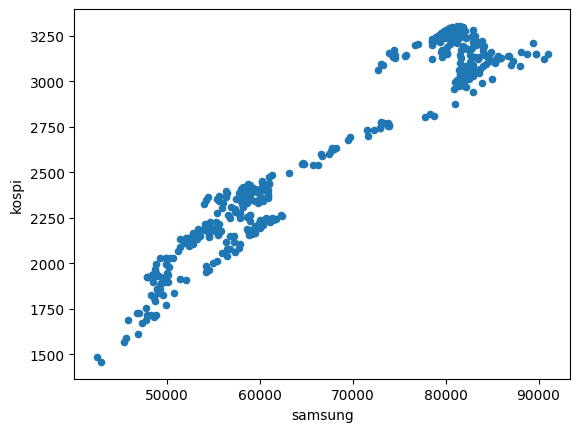

In [30]:
df.plot.scatter(x='samsung', y='kospi')

In [31]:
df.corr()

,kospi,samsung
kospi,1.000000,0.966597
samsung,0.966597,1.000000


In [4]:
kospi = pd.read_excel('../data/kospi.xlsx', usecols=[0,1,4,5,6,7], parse_dates=[0])
kospi.head()

c:\Users\ssjjk\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,일자,종가,시가,고가,저가,거래량
0,2021-08-31,3199.27,3144.49,3199.89,3130.30,661221
1,2021-08-30,3144.19,3160.87,3164.87,3132.77,602858
2,2021-08-27,3133.90,3116.29,3143.01,3106.97,520669
3,2021-08-26,3128.53,3151.30,3159.37,3121.04,727719
4,2021-08-25,3146.81,3148.13,3161.00,3124.25,624688


In [6]:
# groupby 사용하는 함수
# agg() min, mean, max, sum, count, first, last

how = {
    '시가' : 'first',
    '고가' : 'max',
    '저가' : 'min',
    '종가' : 'last',
    '거래량' : 'sum'
}

kospi.groupby(pd.Grouper(key='일자', freq='m')).agg(how) #freq='d', '10d', 'q' = 분기... 다 됨

,시가,고가,저가,종가,거래량
일자,,,,,
2020-01-31,2201.21,2277.23,2119.01,2119.01,13096068
2020-02-29,2086.61,2255.49,1980.82,1987.01,13959766
2020-03-31,1997.03,2089.08,1439.43,1754.64,17091025
2020-04-30,1737.28,1957.51,1664.13,1947.56,21045123
2020-05-31,1906.42,2054.52,1894.29,2029.60,16206497
2020-06-30,2037.04,2217.21,2030.82,2108.33,19863703
2020-07-31,2128.81,2281.41,2101.33,2249.37,18866785
2020-08-31,2251.65,2458.17,2237.04,2326.17,17643125
2020-09-30,2340.19,2450.53,2267.63,2327.89,19606894


# krx 라이브러리 설치
% pip install pykrx

In [1]:
%pip install pykrx

  Using cached pykrx-1.0.40-py3-none-any.whl (125 kB)
  Using cached DateTime-5.0-py3-none-any.whl (52 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
     -------------------------------------- 211.7/211.7 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 50.9/50.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for wrapt: started
  Running setup.py install for wrapt: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: wrapt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [2]:
from pykrx import stock

In [4]:
ticker = stock.get_market_ticker_list('20190225')
ticker         

['095570',
 '068400',
 '006840',
 '027410',
 '282330',
 '138930',
 '001460',
 '001465',
 '001040',
 '079160',
 '000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '037560',
 '000590',
 '012030',
 '016610',
 '005830',
 '000990',
 '000995',
 '139130',
 '004840',
 '155660',
 '069730',
 '017940',
 '007700',
 '114090',
 '078930',
 '006360',
 '001250',
 '007070',
 '078935',
 '012630',
 '039570',
 '089470',
 '294870',
 '082740',
 '003560',
 '175330',
 '234080',
 '001060',
 '001067',
 '001065',
 '096760',
 '105560',
 '002380',
 '009070',
 '009440',
 '119650',
 '092220',
 '001390',
 '001940',
 '025000',
 '092230',
 '000040',
 '044450',
 '030200',
 '033780',
 '030210',
 '058850',
 '093050',
 '003550',
 '034220',
 '001120',
 '051900',
 '051905',
 '003555',
 '032640',
 '011070',
 '066570',
 '066575',
 '108670',
 '108675',
 '051910',
 '051915',
 '079550',
 '006260',
 '000680',
 '010120',
 '229640',
 '023150',
 '035420',
 '181710',
 '005940',
 '005945',
 '034310',
 '008260',
 '004250',

In [6]:
stock.get_market_ticker_list(market='KOSDAQ')

['060310',
 '054620',
 '265520',
 '211270',
 '126600',
 '013720',
 '035760',
 '311690',
 '051500',
 '058820',
 '023460',
 '056730',
 '065770',
 '083660',
 '404950',
 '367340',
 '367360',
 '068790',
 '241520',
 '180400',
 '245620',
 '037370',
 '050120',
 '214270',
 '130500',
 '900290',
 '083450',
 '297890',
 '078150',
 '195940',
 '028300',
 '067630',
 '047920',
 '115450',
 '403870',
 '036640',
 '351340',
 '388790',
 '405350',
 '424760',
 '426550',
 '439730',
 '442770',
 '095340',
 '099520',
 '950170',
 '067290',
 '035900',
 '318000',
 '024840',
 '024120',
 '021320',
 '036670',
 '044180',
 '151860',
 '046440',
 '035600',
 '226360',
 '111870',
 '060720',
 '058400',
 '114450',
 '060370',
 '122450',
 '052900',
 '086960',
 '038340',
 '160550',
 '053290',
 '104200',
 '060250',
 '030190',
 '024940',
 '218410',
 '327260',
 '091340',
 '419530',
 '019550',
 '950110',
 '046140',
 '151910',
 '036120',
 '099220',
 '036540',
 '255220',
 '040610',
 '049470',
 '184230',
 '016250',
 '048550',
 '063440',

In [7]:
df= stock.get_market_ohlcv('20200101','20221220','005930','m')
df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-01-31,55500,62800,54600,56400,319891636
2020-02-29,55500,62000,54200,54200,360007160
2020-03-31,54300,58000,42300,47750,856741868
2020-04-30,47450,52000,45350,50000,424101937
2020-05-31,48900,51200,47200,50700,374264673


In [42]:
stock.get_market_ohlcv('20200102')

,시가,고가,저가,종가,거래량,거래대금,등락률
티커,,,,,,,
095570,4900,5140,4895,5050,210107,1056111000,1.61
068400,11800,11950,11700,11800,86321,1016863100,0.00
006840,34300,35450,33650,34850,29008,1004482200,0.72
027410,5570,5610,5500,5500,119121,659409550,-1.79
282330,169000,170000,167500,168500,21308,3598915000,-0.59
...,...,...,...,...,...,...,...
069260,21100,21150,20600,20600,118882,2463141150,-2.60
000540,3060,3080,3035,3080,20337,62159800,0.49
000547,20250,20300,20250,20300,142,2876950,0.74


In [43]:
import time

In [45]:
tickers = stock.get_market_ticker_list()

In [46]:
tickers[:4]

['095570', '006840', '027410', '282330']

In [47]:
for i in tickers[:4]:
    df = stock.get_market_ohlcv('20210101','20220101', i)
    df.to_csv(f'{i}.csv')
    time.sleep(1)

# CAGR
1. 연복리수익률
2. (최종자산 / 최초자산)^(1/투자기간) - 1

In [48]:
kospi = pd.read_excel('../data/kospi.xlsx', usecols=[0,1], index_col=0, parse_dates=True)

c:\Users\ssjjk\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [51]:
kospi = kospi.sort_index()
kospi.head()

,종가
일자,
2020-01-02,2175.17
2020-01-03,2176.46
2020-01-06,2155.07
2020-01-07,2175.54
2020-01-08,2151.31


In [52]:
수익률 = kospi.iloc[-1, 0] / kospi.iloc[0,0]
수익률

1.4708137754750203

In [53]:
diff = kospi.index[-1] - kospi.index[0]
diff

Timedelta('607 days 00:00:00')

In [55]:
투자기간 = diff.days / 365
CARG = 수익률** (1/ 투자기간) - 1
print(CARG * 100)

26.111719470122587
